# Analyzing cars' MPG

In the given dataset there are 398 different cars from 1970 to 1982.
I will be analyzing some of the aspects and see how they affect the MPG (mile per gallon). The larger MPG number is, the better it is.
The data has some bias in terms of that we don't know the engine size (cc value), the road and weather conditions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
car_df = pd.read_csv("auto_mpg.csv")
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Model 0,Residue,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,21.0,6.0,200.0,100.0,2875.0,17.0,74.0,1.0,ford maverick,23.51457286,6.323077,NaN,NaN,NaN,NaN,NaN,NaN
1,23.0,4.0,151.0,100.0,3035.0,20.5,82.0,1.0,amc concord dl,23.51457286,0.264785,NaN,NaN,NaN,NaN,NaN,NaN
2,23.6,4.0,140.0,100.0,2905.0,14.3,80.0,1.0,ford mustang cobra,23.51457286,0.007298,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,4.0,98.0,100.0,2046.0,19.0,71.0,1.0,ford pinto,23.51457286,2.206494,NaN,NaN,NaN,NaN,NaN,NaN
4,34.5,4.0,100.0,100.0,2320.0,15.8,81.0,2.0,renault 18i,23.51457286,120.679609,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# remove unnecessary columns
car_df.drop(["Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], 
            axis=1, inplace=True)

# remove the last two rows with bad data
car_df.drop([398, 399], axis=0, inplace=True)

We can get a sense of how the data is like by looking at the first 5 values in it.

In [4]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Model 0,Residue
0,21.0,6.0,200.0,100.0,2875.0,17.0,74.0,1.0,ford maverick,23.51457286,6.323077
1,23.0,4.0,151.0,100.0,3035.0,20.5,82.0,1.0,amc concord dl,23.51457286,0.264785
2,23.6,4.0,140.0,100.0,2905.0,14.3,80.0,1.0,ford mustang cobra,23.51457286,0.007298
3,25.0,4.0,98.0,100.0,2046.0,19.0,71.0,1.0,ford pinto,23.51457286,2.206494
4,34.5,4.0,100.0,100.0,2320.0,15.8,81.0,2.0,renault 18i,23.51457286,120.679609


As we can see, this is the information we get, and we want to try and see what affects the fuel consumption the most.
An assumption can be made that, with time, the engines became more efficient and therefore consume less fuel, resulting in better MPG. 
We will see if that is correct later on in the report.

Relevant information to know is that MPG, displacement, horsepower, weight, and acceleration are continues numbers; that means that they can have any value (negative value doesn't make sense in these terms). The others are not, the reason is that a car cannot have a fraction of a cylinder (like 4.5), so it can only be whole numbers. 

Another note, in this report I will ignore the two last columns ("model 0" and "residue") since I can't find their importance to this report, but they are there for you to have a broader knowledge. 

First, let's see the best MPG achieved in each year, and think if it can give us some insight.

In [5]:
# lists categorize by years
year_70 = car_df[car_df.year == 70]
year_71 = car_df[car_df.year == 71]
year_72 = car_df[car_df.year == 72]
year_73 = car_df[car_df.year == 73]
year_74 = car_df[car_df.year == 74]
year_75 = car_df[car_df.year == 75]
year_76 = car_df[car_df.year == 76]
year_77 = car_df[car_df.year == 77]
year_78 = car_df[car_df.year == 78]
year_79 = car_df[car_df.year == 79]
year_80 = car_df[car_df.year == 80]
year_81 = car_df[car_df.year == 81]
year_82 = car_df[car_df.year == 82]

# list of average weight change by year
avg_weight_year = [np.mean(year_70.weight), np.mean(year_71.weight), np.mean(year_72.weight), np.mean(year_73.weight), 
                  np.mean(year_74.weight), np.mean(year_75.weight), np.mean(year_76.weight), np.mean(year_77.weight),
                  np.mean(year_78.weight), np.mean(year_79.weight), np.mean(year_80.weight), np.mean(year_81.weight),
                  np.mean(year_82.weight)]

# labels for axis
years_lab = []
for i in range (13):
    years_lab.append(1970+i)

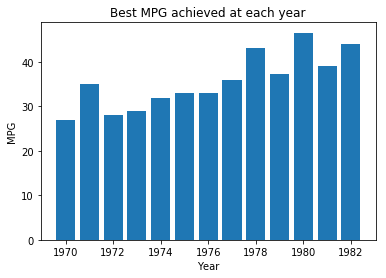

In [6]:
# Dictionary with the best mpg at each year, and the year
d = {"mpg": [max(year_70.mpg), max(year_71.mpg), max(year_72.mpg), max(year_73.mpg), max(year_74.mpg), max(year_75.mpg),
                max(year_76.mpg), max(year_77.mpg), max(year_78.mpg), max(year_79.mpg), max(year_80.mpg), max(year_81.mpg),
                max(year_82.mpg)], "year": years_lab}

# make it to a data frame
best_mpg_year = pd.DataFrame(data = d)

# this plots the best MPG of each year
plt.bar(best_mpg_year.year, best_mpg_year.mpg)
plt.xlabel("Year")
plt.ylabel("MPG")
plt.title("Best MPG achieved at each year")
rcParams['figure.figsize'] = 2, 2
plt.show()

The tendency of this graph is growing, which is good. Yet, this is just the best case from each year, so it doesn't necessarily tell us if this is the truth or just a coincident.
Also, we see that the best MPG was achieved in 1980, even though the newest information we have is from 1982. 
So let's dive deeper and see what we can get from the data

In addition, it is essential to check that we have enough, or about the same amount, of data from each year.
This is to avoid a case that there are only very few cars in one year, which can lead to a false assumption regarding this year

In [7]:
# List with the amount of sampled cars at each year
amount_cars_year = []
for i in range(70, 83):
    amount_cars_year.append(len(car_df[car_df.year == i]))

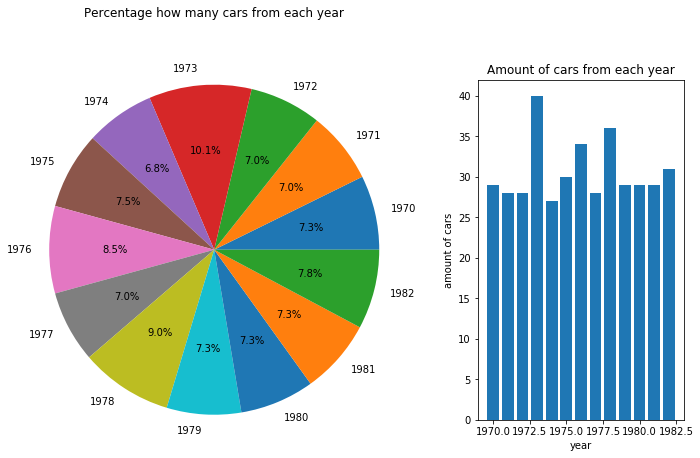

In [24]:
# pie plot
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 10, 10 
plt.pie(amount_cars_year, labels=years_lab, radius=2, autopct="%0.1f%%")
plt.title("Percentage how many cars from each year", y=1.6)

# The bar plot
plt.subplot(1, 2, 2)
plt.bar(years_lab, amount_cars_year)
rcParams['figure.figsize'] = 10, 7
plt.xlabel('year')
plt.ylabel('amount of cars')
plt.title("Amount of cars from each year")
plt.tight_layout()

plt.show()

It can be seen that they are about the same amount of cars from each year, so the data will be considered as normal

Now, let's start. The goal was to see if the MPG got improved along the years; and if so why.
So first we want to answer the first question: was the fuel consumption improved in between 1970 to 1982 as a whole?
The next graph will help visualize it.

In [9]:
# average mpg change by year
avg_mpg_year = [np.mean(year_70.mpg), np.mean(year_71.mpg), np.mean(year_72.mpg), np.mean(year_73.mpg), np.mean(year_74.mpg), 
               np.mean(year_75.mpg), np.mean(year_76.mpg), np.mean(year_77.mpg), np.mean(year_78.mpg), np.mean(year_79.mpg),
               np.mean(year_80.mpg), np.mean(year_81.mpg), np.mean(year_82.mpg)]

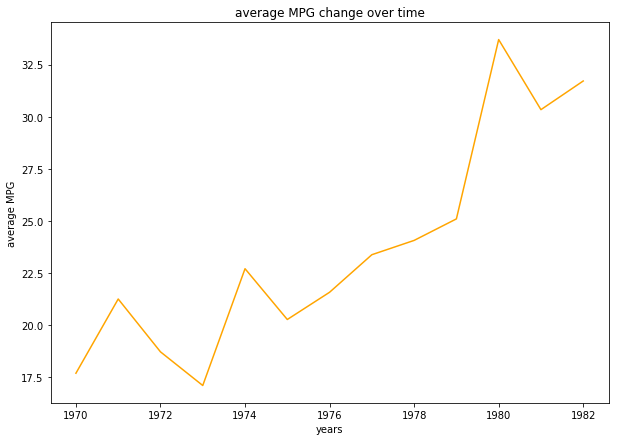

In [10]:
plt.plot(years_lab, avg_mpg_year, color='orange')
plt.title("average MPG change over time")
plt.xlabel("years")
plt.ylabel("average MPG")
plt.show()

This graph definitely shows that the average MPG of the sampled cars got improved.
In 1970 the average was about 17.5 miles per gallon; whereas in 1982  it reached an average of about 32.5 miles per gallon. It has almost doubled.
There are still a few peaks, but the tendency of the graph is clear. As time goes on, cars' engines are more efficient.
Because I used the means, it will be a good idea to know the standard deviation each year.
Furthermore, a t-test can be helpful to understand if, and how much the different groups (each year) are really different from each other

In [11]:
# the standard deviation in each year
std_df = car_df.groupby("year").std()
print("The standard deviation at each year: \n", std_df.mpg)

The standard deviation at each year: 
 year
70.0    5.339231
71.0    6.591942
72.0    5.435529
73.0    4.700245
74.0    6.420010
75.0    4.940566
76.0    5.889297
77.0    6.675862
78.0    6.898044
79.0    6.794217
80.0    7.037983
81.0    5.591465
82.0    5.392548
Name: mpg, dtype: float64


In [12]:
# Calcualte the t values
def ttest(mean1, mean2, std1, std2, size1, size2):
    t_value = (mean1 - mean2) / (((std1**2) / size1) + ((std2**2) / size2))**0.5
    return t_value

# creating a data frame (from two lists) to show the the value when comparing between the years.
std_of_mpg = std_df.mpg
std_list = []
years_list = []
index = 0

# using the t test method to compare between the years.
for i in range (len(avg_mpg_year)):
    for y in range (i):
        std_list.append(ttest(avg_mpg_year[i], avg_mpg_year[y], std_of_mpg[70 + i], std_of_mpg[70 + y], amount_cars_year[i], 
                             amount_cars_year[y]))
        years_list.append("Years {} and {}: ".format(70 + i, 70 + y))

# crating data frame from the lists
ttest_df = pd.DataFrame({
    'years': years_list,
     't_value': std_list})

print(ttest_df.head(16))

                years   t_value
0   Years 71 and 70:   2.236191
1   Years 72 and 70:   0.717703
2   Years 72 and 71:  -1.570442
3   Years 73 and 70:  -0.475881
4   Years 73 and 71:  -2.860895
5   Years 73 and 72:  -1.273230
6   Years 74 and 70:   3.165122
7   Years 74 and 71:   0.828532
8   Years 74 and 72:   2.482878
9   Years 74 and 73:   3.886548
10  Years 75 and 70:   1.922579
11  Years 75 and 71:  -0.639343
12  Years 75 and 72:   1.135572
13  Years 75 and 73:   2.709476
14  Years 75 and 74:  -1.593080
15  Years 76 and 70:   2.744170


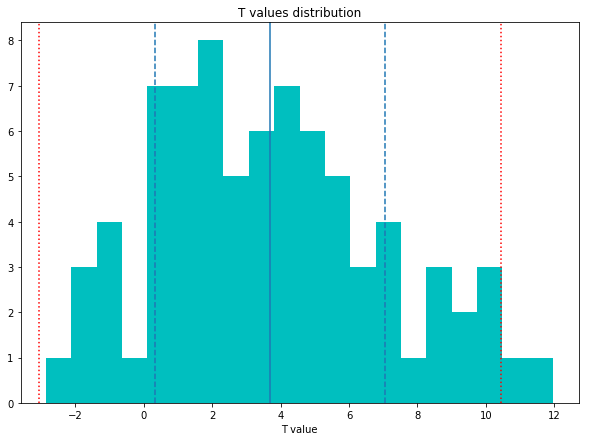

In [13]:
# Plotting histogram of the t values
c = plt.hist(ttest_df.t_value, bins=20, color="c")
plt.xlabel("T value")
plt.title("T values distribution")

# Mean is the solid line, 1 standard deviations away are the dashed lines
plt.axvline(ttest_df.t_value.mean())
plt.axvline(ttest_df.t_value.mean() + (ttest_df.t_value.std()), linestyle="--")
plt.axvline(ttest_df.t_value.mean() - (ttest_df.t_value.std()), linestyle="--")
# two standard deviation aways
plt.axvline(ttest_df.t_value.mean() + (2 * ttest_df.t_value.std()), linestyle=":", color="red")
plt.axvline(ttest_df.t_value.mean() - (2 * ttest_df.t_value.std()), linestyle=":", color="red")
plt.show()

We wanted to see how much the graph before, the MPG over time, was due to a real difference or just due to some luck.
The t-test supposes to help answer this question. The higher the T value is, the more confident we can say that the groups are different. On the other hand, if the t values are very small, we can't tell if the groups are really different or not.

The histogram above shows the t values distribution. It is possible to see that it is not normally distributed, which make it harder to find the p-value and see what is considered as high t value.

Continue, I believe that the two things which affect fuel consumption the most are the weight of the car, and the size of the engine. 
(The size of the engine used to be directly proportional to the power the engine produces, the larger the engine size - the more horsepowers the car has. However, nowadays there is still a connection between the two, but it's not so simple since there are turbocharges and other technics I won't get into in this report.)
The engine's size is not given in the data, so we can't check this fact, but we do know the weight of the cars and how many horsepowers they have. So I will work with these.

The graph below will show the average weight of the cars in each year

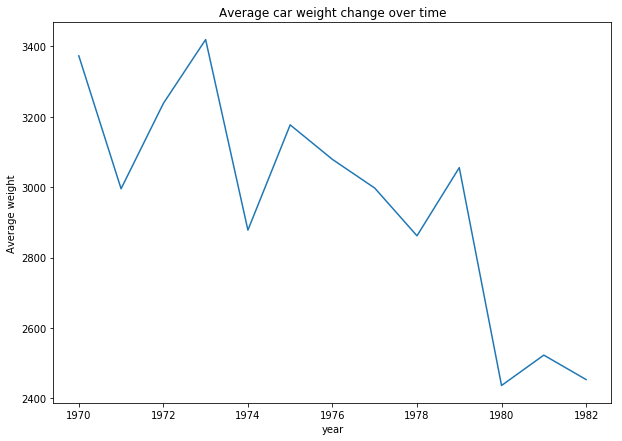

In [14]:
plt.plot(years_lab, avg_weight_year)
plt.title("Average car weight change over time")
plt.ylabel("Average weight")
plt.xlabel("year")
plt.show()

That looks intersting; the weight of the cars look like almost a prefect inverse relation to the fuel consumption.

Next, plotting the graphs together. 

** A note ** 
The weight of the cars was divided by a 100 so that their graphs will show the scale relative to each other. 

In [15]:
# divide the weight by 100 to have it on the same scale as the mpg
avg_100weight_year = []
for i in avg_weight_year:
    i = i / 100
    avg_100weight_year.append(i)

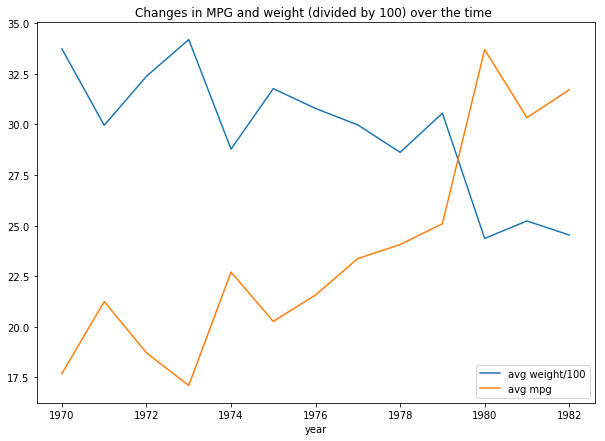

In [16]:
plt.plot(years_lab, avg_100weight_year)
plt.plot(years_lab, avg_mpg_year)
plt.legend(["avg weight/100", "avg mpg"])
plt.title("Changes in MPG and weight (divided by 100) over the time ")
plt.xlabel("year")
plt.show()

That is impressive. The peaks of MPG and weight are almost identical but flipped. That shows an inverse relationship between the two. So let's plot the weight of the car vs. the horsepower and see their relation

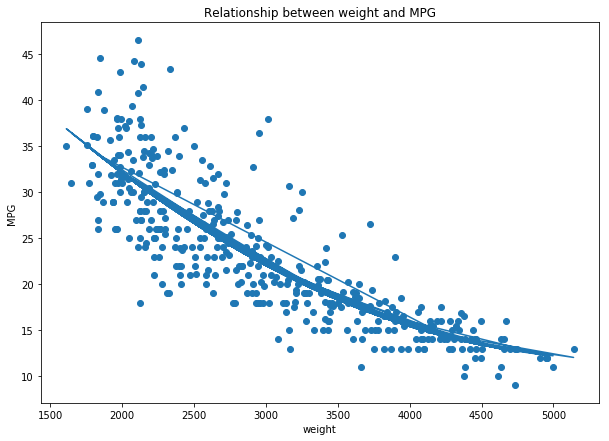

In [17]:
# scatter plot part of the graph
plt.scatter(car_df.weight, car_df.mpg)
plt.title("Relationship between weight and MPG")
plt.xlabel("weight")
plt.ylabel("MPG")

# the line part
linear = np.polyfit(car_df.weight, car_df.mpg, 2)
plt.plot(car_df.weight, np.polyval(linear,car_df.weight))

# show the graphs
plt.show()

The above plot shows an inverse relationship between the weight of the cars and how much fuel they consume. Even though the dots are not very dense and create a straight line (which will indicate that the relationship is linearly inverse and very much related); there is definitely a relationship.

Moving on to the horse power aspect, I will show how the horsepower has changed in this timeframe.
And then we will plot all of three (avg MPG, avg weight, avg HP) on the same graph and show the conclusion. 

In [18]:
# list of average horsepower change by year
avg_hp_year = [np.mean(year_70.horsepower), np.mean(year_71.horsepower), np.mean(year_72.horsepower), np.mean(year_73.horsepower),
              np.mean(year_74.horsepower), np.mean(year_75.horsepower), np.mean(year_76.horsepower), np.mean(year_77.horsepower),
               np.mean(year_78.horsepower), np.mean(year_79.horsepower), np.mean(year_80.horsepower), np.mean(year_81.horsepower), 
               np.mean(year_82.horsepower)]

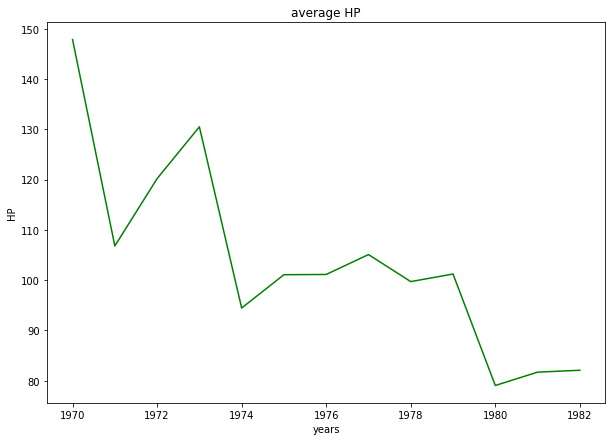

In [19]:
plt.plot(years_lab, avg_hp_year, color="green")
plt.title("average HP")
plt.xlabel("years")
plt.ylabel("HP")
plt.show()

Like before, let's examine the relationship to the weight.

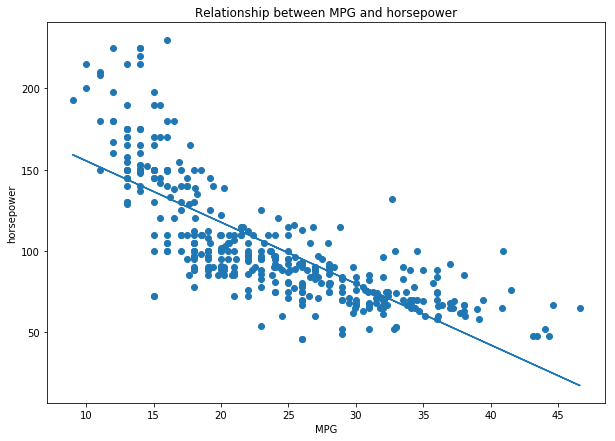

In [20]:
# scatter plot part of the graph
plt.scatter(car_df.mpg, car_df.horsepower)
plt.title("Relationship between MPG and horsepower")
plt.xlabel("MPG")
plt.ylabel("horsepower")

# the line part
linear = np.polyfit(car_df.mpg, car_df.horsepower, 1)
plt.plot(car_df.mpg, np.polyval(linear,car_df.mpg))

# show the graphs
plt.show()

From the graph above, it is possible to see the relationship between horsepower and fuel consumption. The cars with the stronger engine (more horsepower) have worse fuel consumption. A linear fit is still not the best choice here, but rather a polynomial one. Yet, the relationship is pretty clear from the graph.

Now, all together.

** A note ** The horsepower of the cars was divided by 10 so that their graph will still be to scale relatively to each other.

In [21]:
# new list with average horsepower divided by 10
avg_10hp_year = []
for h in avg_hp_year:
    h = h / 10
    avg_10hp_year.append(h)

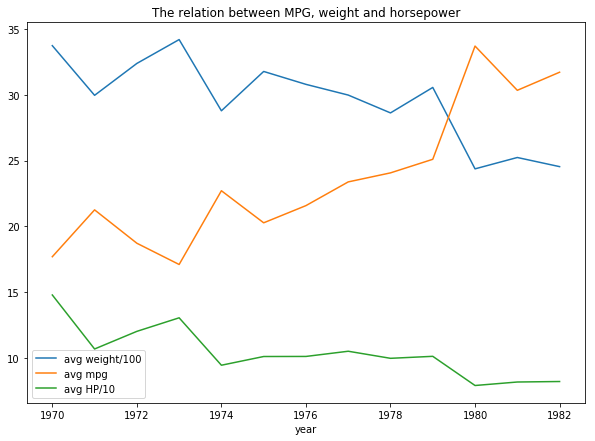

In [22]:
# plotting the three graphs together to show tendency

plt.plot(years_lab, avg_100weight_year)
plt.plot(years_lab, avg_mpg_year)
plt.plot(years_lab, avg_10hp_year)
plt.legend(["avg weight/100", "avg mpg", "avg HP/10"])
plt.title("The relation between MPG, weight and horsepower")
plt.xlabel("year")
plt.show()

From the above graph, it is possible to see that both the weight of the cars and the horsepower amount decreased.
On the other hand, the fuel consumption gets better (higher MPG value). 
This result aligns with the assumption which was made earlier, in the way that the MPG will get higher with newer cars.
However, we cannot conclude that the engines are more efficient because newer cars have smaller engines, on average, and are lighter.  

Before concluding, I will show this table, which shows, numerically, the average of all the data given in each year. 

In [23]:
car_df.groupby("year").mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,Residue
year,,,,,,,,
70.0,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276,1.310345,61.454042
71.0,21.250000,5.571429,209.750000,106.785714,2995.428571,15.142857,1.428571,47.030076
72.0,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000,1.535714,51.532553
73.0,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500,1.375000,62.686745
74.0,22.703704,5.259259,171.740741,94.444444,2877.925926,16.203704,1.666667,40.347495
75.0,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000,1.466667,34.144450
76.0,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176,1.470588,37.431361
77.0,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714,1.571429,42.994927
78.0,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556,1.611111,46.559969


### Conclusion

From the data which was presented, it is possible to conclude that newer cars have better fuel consumption. 
This result comes from several different aspects. The aspects that I focused on were the total weight of the car, how many horsepowers it has. 
Other aspects which seemed to affect the MPG are the number of cylinders and the displacement in the engine. 
In general, everything got decreased - the number of cylinders, displacement, horsepower, weight, acceleration (slower). 
The effect is higher MPG value. 
Both the horsepower and weight have a negative steep incline, which is showed in the graphs presented above.

Credit:
The dataset was given to me by my mentor Vikram Bandugula.  